## Average number of classes attended by a student(On a Scale of 1 to 10)



import csv

def calculate_column_mean(csv_file, column_index):
    total = 0
    count = 0
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        
        next(reader, None)
 
        for row in reader:
            try:
                value = float(row[column_index])
                total += value
                count += 1
            except ValueError:
                print(f"Skipping non-numeric value: {row[column_index]}")
    
    if count > 0:
        mean = total / count
        return mean
    else:
        return None

csv_file = 'data.csv' 
column_index = 17  

mean = calculate_column_mean(csv_file, column_index)
if mean is not None:
    print(f"Mean of column {column_index}: {mean}")
else:
    print("No valid values found in the specified column.")


## Variance Of Number Of classes attended by a student(On a scale of 1 to 10)

In [39]:
import csv
import math

def calculate_column_mean(csv_file, column_index):
    # Initialize variables
    total = 0
    count = 0
    
    # Open the CSV file
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        
        # Skip header row if exists
        next(reader, None)
        
        # Iterate over each row and sum up the values in the specified column
        for row in reader:
            try:
                value = float(row[column_index])/10
                total += value
                count += 1
            except ValueError:
                print(f"Skipping non-numeric value: {row[column_index]}")
    
    # Calculate the mean
    if count > 0:
        mean = total / count
        print("Sample mean:",mean)
        return mean
    else:
        return None

def calculate_sample_standard_deviation(csv_file, column_index):
 
    mean = calculate_column_mean(csv_file, column_index)
    
    if mean is None:
        return None
 
    squared_diff_sum = 0
    count = 0
    
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
       
        next(reader, None)
        
        for row in reader:
            try:
                value = float(row[column_index])/10
                squared_diff = (value - mean) ** 2
                squared_diff_sum += squared_diff
                count += 1
            except ValueError:
                continue
    
    if count > 1:
        sample_variance = squared_diff_sum / (count - 1)
        sample_std_dev = math.sqrt(sample_variance)
        return sample_std_dev
    else:
        return None
        
csv_file = 'data.csv'  
column_index = 17  

std_dev = calculate_sample_standard_deviation(csv_file, column_index)
if std_dev is not None:
    print(f"Sample standard deviation of column {column_index}: {std_dev}")
else:
    print("Insufficient data to calculate sample standard deviation.")


Sample mean: 0.605405405405403
Sample standard deviation of column 17: 0.2105035714995809


## Making a modified csv file with by dividing no. of classes by 10 

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('data.csv')

# Specify the column you want to divide by 10
column_name = 'No of Classes'

# Divide the values in the specified column by 10
df[column_name] = df[column_name] / 10

# Write the modified DataFrame back to a new CSV file
df.to_csv('modified_file.csv', index=False)


## Plotting a scatter plot for attendance vs no. of registered courses

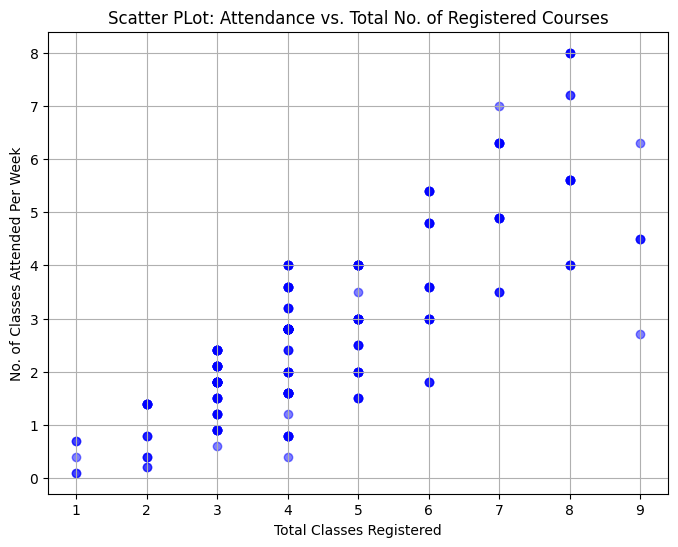

In [16]:
import matplotlib.pyplot as plt
import csv

# Initialize lists to store data
classes_attended_per_week = []
classes_registered = []

# Read data from CSV file
with open('modified_file.csv', 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    next(csv_reader)  # Skip header if exists
    for row in csv_reader:
        classes_registered.append(int(row[16]))  # Assuming the registration data is in the first column
        classes_attended_per_week.append(float(row[17]) * int(row[16]))  # Assuming the attendance data is in the second column

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(classes_registered, classes_attended_per_week, color='blue', alpha=0.5)
plt.title('Scatter PLot: Attendance vs. Total No. of Registered Courses')
plt.xlabel('Total Classes Registered')
plt.ylabel('No. of Classes Attended Per Week')
plt.grid(True)
plt.savefig('attendance_vs_totalcourses_plot.png')
plt.show()



## Computing correlation coefficient for no. of courses and no. of classes


In [17]:
import pandas as pd

df = pd.read_csv('modified_file.csv')

column1 = 'No.of Courses'
column2 = 'No of Classes'

df['new_column'] = df[column1] * df[column2]

df.to_csv('output_file.csv', index=False)


In [22]:
import pandas as pd

df = pd.read_csv('output_file.csv')  

x = df['No.of Courses']  
y = df['new_column']  

correlation_coefficient = y.corr(x)

print("Correlation coefficient:", correlation_coefficient)


Correlation coefficient: 0.8066105564941394


## Plotting Bar graph for No. of students vs attendance

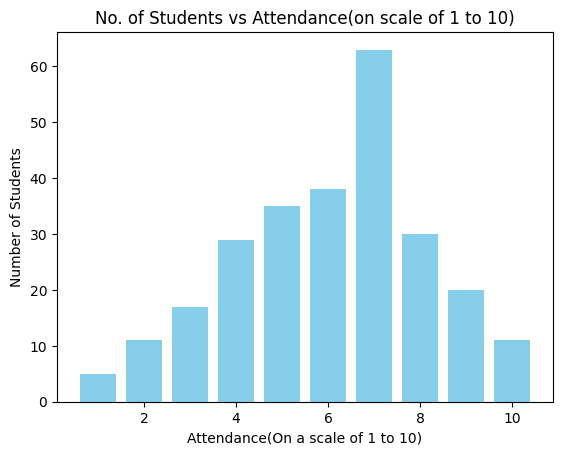

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

classes_attended = df['No of Classes']

class_counts = classes_attended.value_counts().sort_index()

# Extracting x and y values for plotting
x_values = class_counts.index
y_values = class_counts.values

# Plotting the bar graph
plt.bar(x_values, y_values, color='skyblue')

# Adding labels and title
plt.xlabel('Attendance(On a scale of 1 to 10)')
plt.ylabel('Number of Students')
plt.title('No. of Students vs Attendance(on scale of 1 to 10)')
plt.savefig('no._students_vs_attendance_plot.png')
# Display the plot
plt.show()


In [49]:
import pandas as pd

df = pd.read_csv('output_file.csv')

# Assuming 'attendance' and 'cgpa' are the column names in the DataFrame
attendance = df['No of Classes']
cgpa = df['What is your current CGPA? (ex. 7.73)']

# Calculate the correlation coefficient
correlation = attendance.corr(cgpa)

print("Correlation coefficient between attendance and CGPA:", correlation)


Correlation coefficient between attendance and CGPA: 0.2034071886817237


## Plotting Heatmap for Attendance vs CGPA

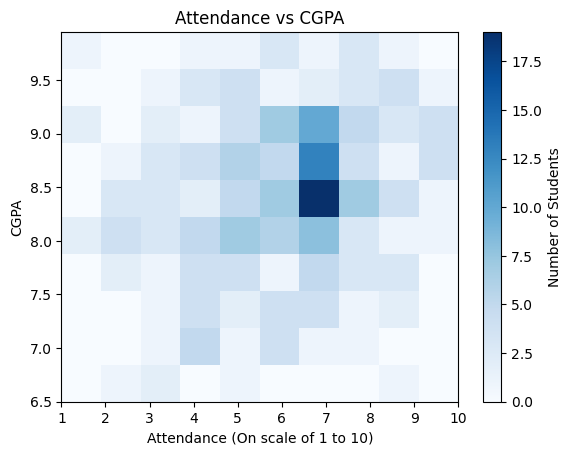

In [48]:
import matplotlib.pyplot as plt

# Assuming 'attendance' and 'cgpa' are the columns in your DataFrame
plt.hist2d(df['No of Classes'], df['What is your current CGPA? (ex. 7.73)'], bins=(10, 10), cmap='Blues')

# Adding labels and title
plt.xlabel('Attendance (On scale of 1 to 10)')
plt.ylabel('CGPA')
plt.title('Attendance vs CGPA')

# Adding a colorbar
plt.colorbar(label='Number of Students')
plt.savefig('attendance_vs_cgpa.png')
# Display the plot
plt.show()


## Finding proportion of students who attend more classes after low scores

In [5]:
import pandas as pd

df = pd.read_csv('output_file.csv')
# Assign numerical values to responses
df['attendance_numeric'] = df['Do you care to attend classes after getting low score in exams?'].map({'Yes': 1, 'Sometimes': 0.5, 'No': 0})

# Count the number of students attending classes based on their numerical responses
num_attendees = (df['attendance_numeric'] > 0).sum()

# Display the count
print("Number of students attending classes after low scores:", num_attendees)


Number of students attending classes after low scores: 220


In [10]:
import pandas as pd

# Assuming your data is in a DataFrame called 'df' and the column name is 'attendance_after_low_score'
# Replace 'attendance_after_low_score' with the actual name of your column
df = pd.read_csv('output_file.csv')

# Define the frequency percentages
frequency_percentages = [0.331, 0.519, 0.15]

# Assign numerical values to responses
df['attendance_numeric'] = df['Do you care to attend classes after getting low score in exams?'].map({'Yes': 1, 'Sometimes': 0.5, 'No': 0})

# Ensure the length of frequency percentages matches the number of rows in the DataFrame
# If the length does not match, repeat the last value to match the number of rows
if len(frequency_percentages) != len(df):
    diff = len(df) - len(frequency_percentages)
    frequency_percentages += [frequency_percentages[-1]] * diff

# Calculate weighted sum
weighted_sum = (df['attendance_numeric'] * frequency_percentages).sum()

# Display the weighted sum
print("Weighted sum of students attending classes after low scores:", weighted_sum)


Weighted sum of students attending classes after low scores: 26.915499999999994


## Plotting pie chart for attendance after low scores 

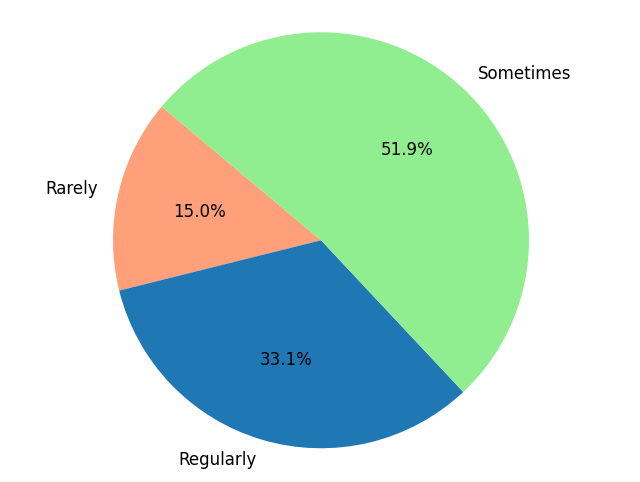

In [31]:
import matplotlib.pyplot as plt

# Define the frequency percentages
frequency_percentages = [ 15,33.1,51.9]  # Assuming these are the percentages in the same order as 'Regularly', 'Sometimes', 'Rarely'

# Define labels for the pie chart
labels = ['Rarely','Regularly','Sometimes']

# Define colors for the pie chart slices
colors = ['#FFA07A','#1f77b4','#90EE90']  # Dark blue, light blue, yellow

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(frequency_percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'color': 'black', 'fontsize': 12})
#plt.title('Percentage of Students Attending Classes After Getting Low Scores')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.savefig('pie_chart_peer_attendance_affect.png')
plt.show()
